In [5]:
%load_ext autoreload
%autoreload 1
%aimport modules.dataset_auxiliary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import tensorly as tl
from tensorly import random
import os
import pickle
import modules.dataset_auxiliary as daux
from modules.dataset_auxiliary import *
import copy


In [9]:
ls

env/  modules/  tensors.ipynb  tensors_my.ipynb


## Load inisial ds_dict

In [12]:
# current version
file_path = r'backup/ds_dict.pkl'

# # save:
# with open(file_path, 'wb') as f:
#     pickle.dump(ds_dict, f)

# load:
with open(file_path, 'rb') as f:
    ds_dict = pickle.load(f)

check_ds_dict(ds_dict)
print()

True 	Info: 7468;   Skeleton: 7468;   Total: 7468



In [13]:
ds_dict['G101__trial1__both__moving_right'][INFO_KEY]['label']

{'is_valid_performance': True, 'action_start': 27.5, 'action_end': 78.5}

In [111]:
df = ds_dict['G101__trial1__both__moving_right'][SKELETON_KEY]

In [112]:
df.columns

Index(['pose__0__x', 'pose__0__y', 'pose__0__z', 'pose__1__x', 'pose__1__y',
       'pose__1__z', 'pose__2__x', 'pose__2__y', 'pose__2__z', 'pose__3__x',
       ...
       'right_hand__17__z', 'right_hand__18__x', 'right_hand__18__y',
       'right_hand__18__z', 'right_hand__19__x', 'right_hand__19__y',
       'right_hand__19__z', 'right_hand__20__x', 'right_hand__20__y',
       'right_hand__20__z'],
      dtype='object', length=324)

In [118]:
df

,pose__0__x,pose__0__y,pose__0__z,pose__1__x,pose__1__y,pose__1__z,pose__2__x,pose__2__y,pose__2__z,pose__3__x,...,right_hand__17__z,right_hand__18__x,right_hand__18__y,right_hand__18__z,right_hand__19__x,right_hand__19__y,right_hand__19__z,right_hand__20__x,right_hand__20__y,right_hand__20__z
0,0.512595,0.484009,-0.409428,0.521294,0.469254,-0.384514,0.525943,0.469659,-0.384942,0.531962,...,0.002836,0.426270,0.878534,0.002662,0.432297,0.879091,0.003888,0.435529,0.875976,0.004906
1,0.512616,0.484016,-0.413717,0.521345,0.469265,-0.388221,0.525978,0.469687,-0.388652,0.532004,...,0.002646,0.426945,0.878205,0.002233,0.432903,0.878460,0.003245,0.436026,0.875164,0.004165
2,0.512626,0.484025,-0.417312,0.521361,0.469301,-0.391829,0.525993,0.469745,-0.392265,0.532028,...,0.001574,0.426630,0.879119,0.001098,0.432479,0.879473,0.002389,0.435332,0.876027,0.003569
3,0.512654,0.484031,-0.419656,0.521409,0.469319,-0.393647,0.526032,0.469779,-0.394079,0.532081,...,0.001511,0.426766,0.878317,0.001159,0.432527,0.878515,0.002419,0.435380,0.875097,0.003518
4,0.512662,0.484051,-0.417392,0.521417,0.469343,-0.391532,0.526038,0.469812,-0.391981,0.532103,...,0.002023,0.427422,0.879538,0.001320,0.433545,0.880424,0.002293,0.436677,0.877395,0.003298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.511860,0.483146,-0.424479,0.519128,0.468490,-0.398346,0.524910,0.468799,-0.398750,0.531328,...,0.002607,0.426074,0.875140,0.002299,0.432794,0.879291,0.002987,0.437749,0.879949,0.003818
117,0.512002,0.483151,-0.421792,0.519229,0.468492,-0.395486,0.525032,0.468800,-0.395898,0.531449,...,0.003150,0.425949,0.875421,0.002517,0.432882,0.879518,0.002985,0.438240,0.880029,0.003737
118,0.512089,0.483154,-0.421733,0.519294,0.468494,-0.395515,0.525100,0.468802,-0.395928,0.531530,...,0.002630,0.425650,0.876210,0.001925,0.432519,0.880617,0.002405,0.437944,0.881350,0.003152
119,0.512243,0.483152,-0.422283,0.519381,0.468494,-0.396434,0.525193,0.468802,-0.396847,0.531619,...,0.002993,0.425199,0.875177,0.002785,0.431948,0.880166,0.003479,0.437506,0.881504,0.004304


In [117]:
df_1 = form_important_points(df)
df_1.columns

Index(['pose__0__x', 'pose__0__y', 'pose__0__z', 'pose__1__x', 'pose__1__y',
       'pose__1__z', 'pose__2__x', 'pose__2__y', 'pose__2__z', 'pose__3__x',
       ...
       'right_hand__6__z', 'right_hand__7__x', 'right_hand__7__y',
       'right_hand__7__z', 'right_hand__8__x', 'right_hand__8__y',
       'right_hand__8__z', 'right_hand__9__x', 'right_hand__9__y',
       'right_hand__9__z'],
      dtype='object', length=135)

## Selecting 

In [176]:
def select_valid_samplels(ds_dict):
    data_dict = copy.deepcopy(ds_dict)
    len_ds = len(ds_dict.keys())
    for g_id in ds_dict.keys():
        is_valid = ds_dict[g_id][INFO_KEY]['label']['is_valid_performance']
        if not is_valid:
            del data_dict[g_id]
      
    len_ds = len(ds_dict.keys())      
    len_data = len(data_dict.keys())
    print(f"{len_ds - len_data} samples was unvalied. Ramain {len_data}({len_ds})") 
            
    return data_dict

def select_g_ids(input_data_dict, subs=None, gestures=None, trials=None, hands=None):
    data_dict = {}
    if subs == None:
        subs = get_all_subs_from_ds_dict(input_data_dict)
    if gestures == None:
        gestures = get_all_gestures_from_ds_dict(input_data_dict)
    if trials == None:
        trial_names = get_all_trial_names_from_ds_dict(input_data_dict)
    else:
        trial_names = [f"trail{trial}" for trial in trials]
        
    if hands == None:
        hands = get_all_hands_from_ds_dict(input_data_dict)
        
    for sub in subs:
        for trial_name in trial_names:
            for gesture in gestures:
                for hand in hands:
                    # print(sub, trial_name, gesture, hand)
                    g_id = form_g_id(sub, trial_name, hand, gesture)
                    if g_id in input_data_dict.keys():
                        data_dict[g_id] = copy.deepcopy(input_data_dict[g_id])
                        
    len_in = len(input_data_dict.keys())      
    len_out= len(data_dict.keys())
    print(f"Selected  {len_out} samples. {len_in - len_out}({len_in}) was dropped!") 
                    
    return data_dict


def form_important_points(df_skeleton, coords=['x', 'y', 'z'], pose_points='def', hand_points='def'):
    # for pose
    df = df_skeleton
    coords = ''.join(coords)
    if pose_points == 'def':
        pose_points = [i for i in range(25)]
    if hand_points == 'def':
        hand_points = [i for i in range(21)]
        
        
        
    pose_points = '|'.join([str(i) for i in pose_points])
    cols_pose = df.columns.str.match(f"^pose__({pose_points})__[{coords}]")
    cols_pose = list(df.columns[cols_pose])

    cols_hands = df.columns.str.match(f"^(right|left)_hand__({hand_points})__[{coords}]")
    cols_hands = list(df.columns[cols_hands])
    
    cols = cols_pose + cols_hands
    df = df[cols]
    return df    



def update_skeleton(input_data_dict, update_df_func, kwargs={}, show=True):
    data_dict = copy.deepcopy(input_data_dict)
    delta_list = []
    for g_id in data_dict.keys():
        df = data_dict[g_id][SKELETON_KEY]
        df, delta = update_df_func(df, **kwargs)
        data_dict[g_id][SKELETON_KEY] = df
        delta_list += [delta]
        
    if show:
        plt.plot(delta_list)
        plt.title('Delta')
        plt.gcf().set_size_inches((6, 1))
        
    return data_dict       


def select_points(input_data_dict, coords=['x', 'y', 'z'], pose_points='def', hand_points='def', show=True):
    kwargs = {'coords':coords, 'pose_points':pose_points, 'hand_points':hand_points,}
    data_dict = update_skeleton(input_data_dict, update_df_select_points, kwargs, show)
    
    if show:
        plt.title('Delta len for points')
        
    return data_dict


def update_df_fill_na(df, value=None, method=None, axis=None, limit=None):
    delta = df.isna().sum()
    df = df.fillna(value=value, method=method, axis=axis, limit=limit)
    return df, delta

def update_df_select_points(df, coords=['x', 'y', 'z'], pose_points='def', hand_points='def'):
    before = len(df.columns)
    df = form_important_points(df, coords, pose_points, hand_points)
    after = len(df.columns)
    return df, before - after 

def update_df_solve_time(df, max_time=120):
    delta = True
    df = df.iloc[:max_time, :]
    return df, delta





def get_class_name_from_g_id(g_id):
    sep = '__'
    gesture = get_gesture_from_g_id(g_id)
    hand =  get_hand_from_g_id(g_id)
    class_name = sep.join([hand, gesture])
    return class_name
    
CLASS_NAME_KEY = 'class_name'
CLASS_LABEL_KEY = 'class_label'


def form_gesture_labels(data_dict):
    name_label_dict = {}
    current_label = 0
    for g_id in data_dict.keys():
        class_name = get_class_name_from_g_id(g_id)
        if class_name not in name_label_dict.keys():
            name_label_dict[class_name] = current_label
            current_label += 1
                   
        data_dict[g_id][CLASS_NAME_KEY] = class_name
        data_dict[g_id][CLASS_LABEL_KEY] = name_label_dict[class_name]
        
        
    # switching keys and values
    label_dict = {y: x for x, y in name_label_dict.items()}
    return data_dict, label_dict


def form_samples_labels_lists(data_dict):
    samples_list,  labels_list = [], []
    for g_id in data_dict.keys():
        labels_list += [data_dict[g_id][CLASS_LABEL_KEY]]
        data = data_dict[g_id][SKELETON_KEY].to_numpy()
        samples_list += [np.expand_dims(data, 0)]
    return samples_list,  labels_list



        
        
    
    

In [ ]:
gestures = ['start', 'call', 'mute', 'pupil', 'high', 'select', 'unmute', 'close', 'yes', 'no', 'save']
# gestures = ['scroll_up', 'scroll_down', 'swipe_right', 'swipe_left', 'export'] 
# gestures = ['screenshot', 'writing', 'delete']
# gestyres = ['moving_down', 'moving_left', 'moving_right', 'moving_up', 'moving_back', 'moving_forward']
# gestures = ['anticlockwise', 'clockwise', 'right_forward', 'left_forward']
# gesture = ['zoom_in_c', 'zoom_out_c', 'zoom_out_l', 'zoom_out_r', 'zoom_in_l',  'zoom_in_r']
# gesture = ['yes_head', 'no_head']

Selected  2812 samples. 4656(7468) was dropped!
14 samples was unvalied. Ramain 2798(2812)


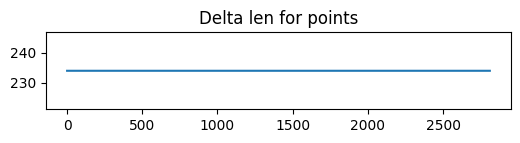

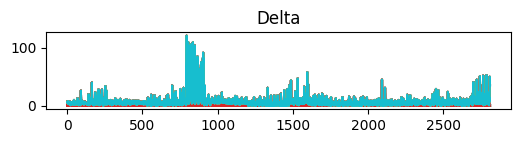

Train
Selected  2141 samples. 671(2812) was dropped!
Test
Selected  671 samples. 2141(2812) was dropped!


In [281]:
# preparing

subs = get_all_subs_from_ds_dict(ds_dict)
subs = subs[:]
gestures = ['start', 'call', 'mute', 'pupil', 'high', 'select', 'unmute', 'close', 'yes', 'no', 'save']


data_dict_selected = select_g_ids(ds_dict, subs=subs, gestures=gestures)
data_dict_valid =  select_valid_samplels(data_dict_selected)

# points
data_dict_points = select_points(data_dict_selected, coords=['x', 'y'])
plt.show()

# nan
data_dict_filled = update_skeleton(data_dict_points, update_df_fill_na, {'value':0})
plt.show()

data_dict_adjusted = update_skeleton(data_dict_filled, update_df_solve_time, show=False)


#train
print('Train')
data_dict = select_g_ids(data_dict_adjusted, subs=subs[0:16])
data_dict, label_dict = form_gesture_labels(data_dict)
samples_list,  labels_list = form_samples_labels_lists(data_dict)
tensor = np.concatenate(samples_list, axis=0)

#test 
print('Test')
data_dict_test = select_g_ids(data_dict_adjusted, subs=subs[16:])
data_dict_test, label_dict_test = form_gesture_labels(data_dict_test)
samples_list_test,  labels_list_test = form_samples_labels_lists(data_dict_test)
tensor_test = np.concatenate(samples_list_test, axis=0)



In [303]:
import tensorly as tl
from tensorly import random
from tensorly.decomposition import tucker, parafac, non_negative_tucker
from tensorly.tenalg import mode_dot, multi_mode_dot

In [304]:
t = tensor
tt = tensor_test

factors = parafac(t, rank=8)


In [307]:
classes = factors.factors[0]
classes_test = multi_mode_dot(tt, [matrix.T for matrix in factors.factors[1:]], modes=[1, 2])

In [325]:
tl.diag((1,1,1), size=(3,3,3))

TypeError: _diag_dispatcher() got an unexpected keyword argument 'size'

In [319]:
classes.shape

(2141, 8)

In [320]:
classes_test.shape

(671, 8, 8)

## ML part 

### Origin

In [283]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [284]:
def make_X_y(tensor, labels_list):
    X = tensor.reshape(tensor.shape[0], -1)
    y = np.array(labels_list)
    return X, y

def plot_confusion_matrix(y_test, label, label_dict):
    # print(classification_report(label, y_test,
    #                             target_names=[l for l in label_dict.values()]))

    conf_mat = confusion_matrix(label, y_test)

    fig = plt.figure(figsize=(6,6))
    width = np.shape(conf_mat)[1]
    height = np.shape(conf_mat)[0]

    res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
    for i, row in enumerate(conf_mat):
        for j, c in enumerate(row):
            if c>0:
                plt.text(j-.2, i+.1, c, fontsize=8)
                
    cb = fig.colorbar(res)
    plt.title('Confusion Matrix')
    _ = plt.xticks(range(22), [l for l in label_dict.values()], rotation=90)
    _ = plt.yticks(range(22), [l for l in label_dict.values()])
    
def print_classification_report(y_test, label, label_dict):
    print(classification_report(label, y_test,
                                target_names=[l for l in label_dict.values()]))
    
    

#### LogReg

In [285]:
model = LogisticRegression(max_iter=200)
X_train, y_train = make_X_y(tensor, labels_list)
X_test, y_test = make_X_y(tensor_test, labels_list_test)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train, y_train)

/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

1.0


Text(0.5, 1.0, 'Confusion Matrix: Train data')

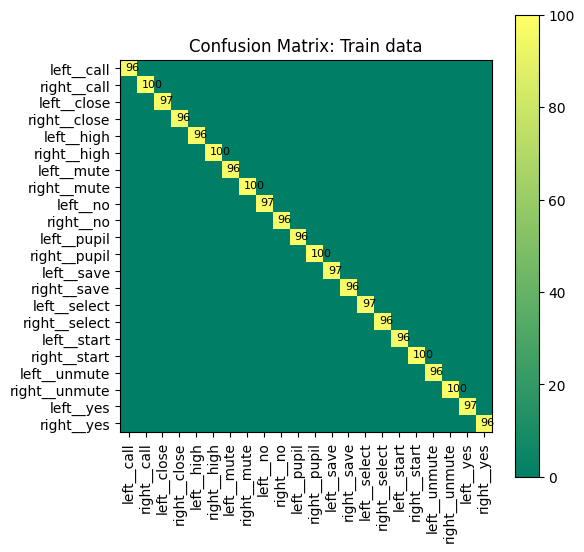

In [288]:
label = model.predict(X_train)
acc = accuracy_score(y_train, label)
print(acc)
plot_confusion_matrix(y_train, label, label_dict)
plt.title('Confusion Matrix: Train data')

0.698956780923994


Text(0.5, 1.0, 'Confusion Matrix: Test data')

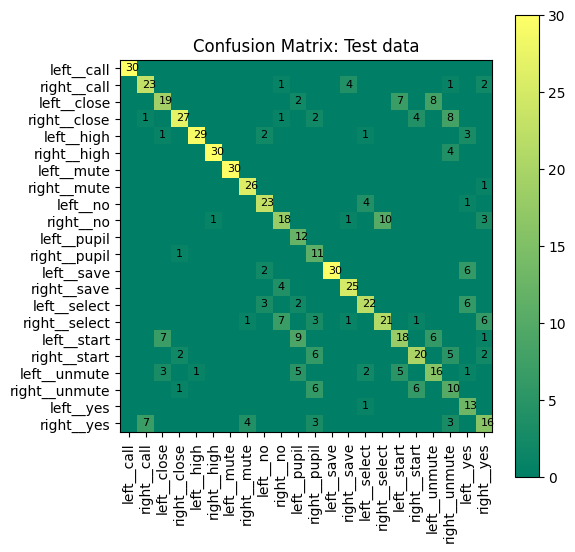

In [289]:
label = model.predict(X_test)
acc = accuracy_score(y_test, label )
print(acc)
plot_confusion_matrix(y_test, label, label_dict)
plt.title('Confusion Matrix: Test data')

#### KNN

In [299]:
model = KNeighborsClassifier(n_neighbors=3)
X_train, y_train = make_X_y(tensor, labels_list)
X_test, y_test = make_X_y(tensor_test, labels_list_test)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

0.8024287716020552


Text(0.5, 1.0, 'Confusion Matrix: Train data')

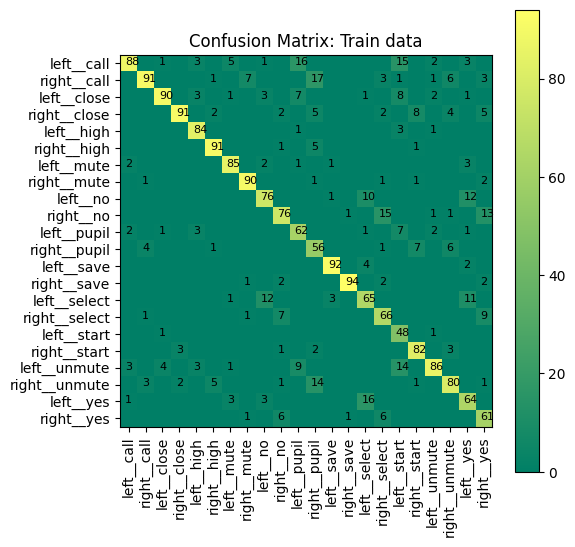

In [300]:
label = model.predict(X_train)
acc = accuracy_score(y_train, label)
print(acc)
plot_confusion_matrix(y_train, label, label_dict)
plt.title('Confusion Matrix: Train data')

OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

0.36661698956780925


Text(0.5, 1.0, 'Confusion Matrix: Test data')

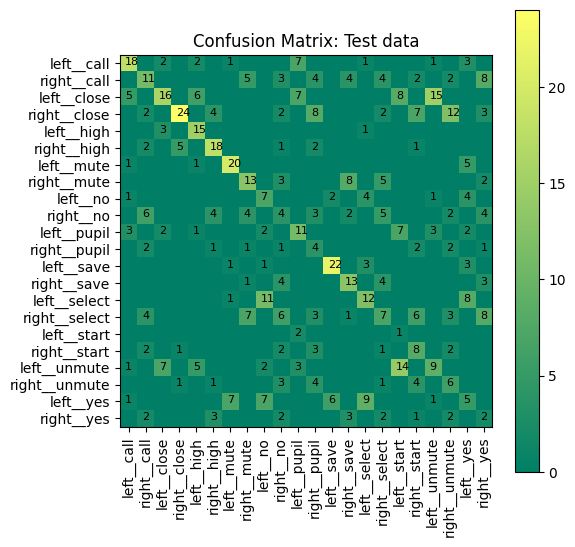

In [301]:
label = model.predict(X_test)
acc = accuracy_score(y_test, label )
print(acc)
plot_confusion_matrix(y_test, label, label_dict)
plt.title('Confusion Matrix: Test data')

### After CPD

#### KNN

In [314]:
model = KNeighborsClassifier(n_neighbors=3)
X_train, y_train = make_X_y(classes, labels_list)
X_test, y_test = make_X_y(classes_test, labels_list_test)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [316]:
X_train.shape

(2141, 8)

0.674451191032228


Text(0.5, 1.0, 'Confusion Matrix: Train data')

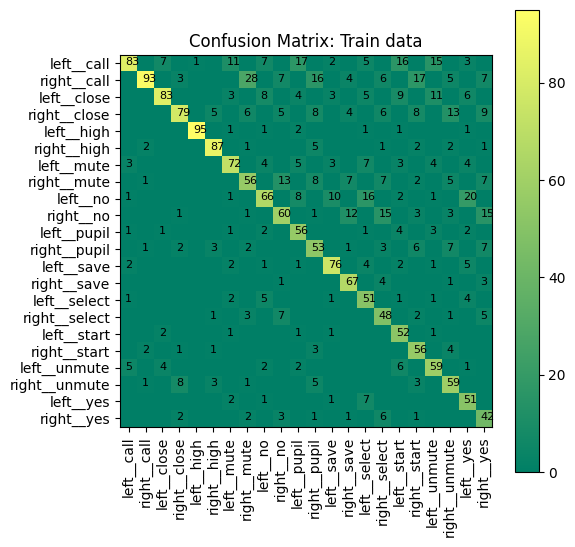

In [312]:
label = model.predict(X_train)
acc = accuracy_score(y_train, label)
print(acc)
plot_confusion_matrix(y_train, label, label_dict)
plt.title('Confusion Matrix: Train data')

In [313]:
label = model.predict(X_test)
acc = accuracy_score(y_test, label )
print(acc)
plot_confusion_matrix(y_test, label, label_dict)
plt.title('Confusion Matrix: Test data')

ValueError: X has 64 features, but KNeighborsClassifier is expecting 8 features as input.